In [5]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [6]:
import json

# Load configuration
with open("../../config/config_notebooks_TNBC_with_HER2_model.json", "r") as config_file:
    config = json.load(config_file)


In [7]:
## Try to plot the bootstrapped ARI patient values
df_boot = pd.DataFrame()
for model_type, names, benchmark_path in zip([config['retrained_model_list2_type']],
                                             [config['retrained_model_list2']],
                                             [config['retrained_benchmark_folder2']]):
    path_to_unsupervised_clustering = os.path.join(benchmark_path, "unsupervised_clustering_ARI", "kmeans")
    
    for name in names:
        print(f"Processing {name}...")
        bootstrapped_files = glob.glob(os.path.join(path_to_unsupervised_clustering, f"boostraped_ARI_patient_{name}_10*.json"))
        print(f"Found bootstrapped files: {bootstrapped_files}")
        if len(bootstrapped_files) > 0:
            with open(bootstrapped_files[0], "r") as f:
                ari_patient = json.load(f)
                
                df_boot[name] = ari_patient[name]


Processing uni...
Found bootstrapped files: ['../../results/TNBC/benchmark/HER2_full_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_patients.json', '../../results/TNBC/benchmark/HER2_full_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_19_patients.json']
Processing uni_full_koleo_4096_prototypes...
Found bootstrapped files: ['../../results/TNBC/benchmark/HER2_full_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_full_koleo_4096_prototypes_10_patients.json', '../../results/TNBC/benchmark/HER2_full_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_full_koleo_4096_prototypes_10_19_patients.json']
Processing HER2_uni_full_koleo_16384_prototypes...
Found bootstrapped files: ['../../results/TNBC/benchmark/HER2_full_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_HER2_uni_full_koleo_16384_prototypes_10_patients.json']


In [8]:
df_boot.mean()

uni                                     0.264373
uni_full_koleo_4096_prototypes          0.125571
HER2_uni_full_koleo_16384_prototypes    0.093951
dtype: float64

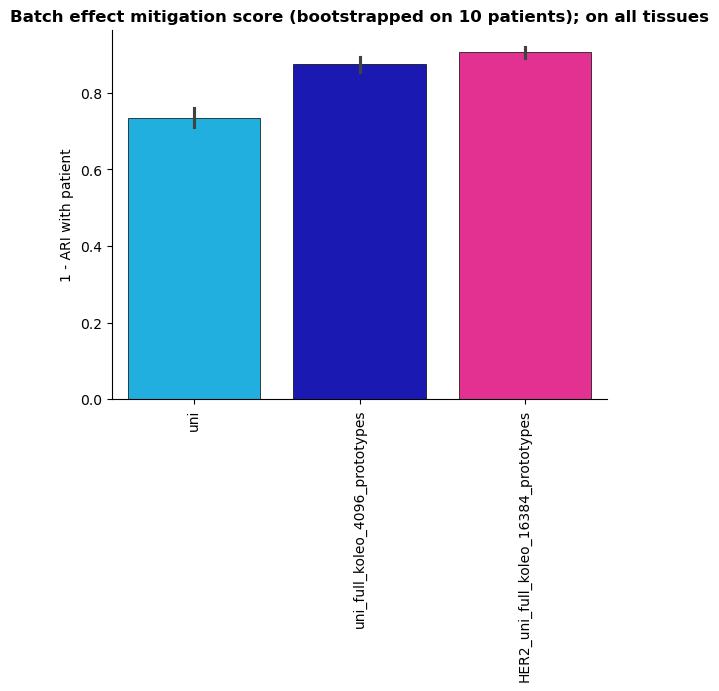

In [11]:
import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models

retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)


if len(df_boot) > 0:
  df_boot = df_boot.T.loc[sorted_retrained_models].T
  
  df_boot = 1 - df_boot
  
  sns.barplot(data=df_boot, 
              palette=config["retrained_color_palette"],
            linewidth=0.5,
            edgecolor="black",
            )
  plt.ylabel("1 - ARI with patient")
  plt.title("Batch effect mitigation score (bootstrapped on 10 patients); on all tissues", weight='bold')
  plt.xticks(rotation=90)
  sns.despine()